<a href="https://colab.research.google.com/github/Astraxx04/ML_Models/blob/main/Bikes_LReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import RandomOverSampler 
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns 
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [132]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday","Seasons"], axis=1)

In [133]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


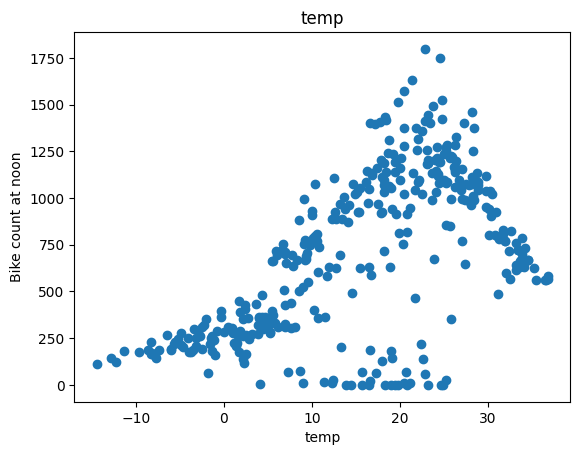

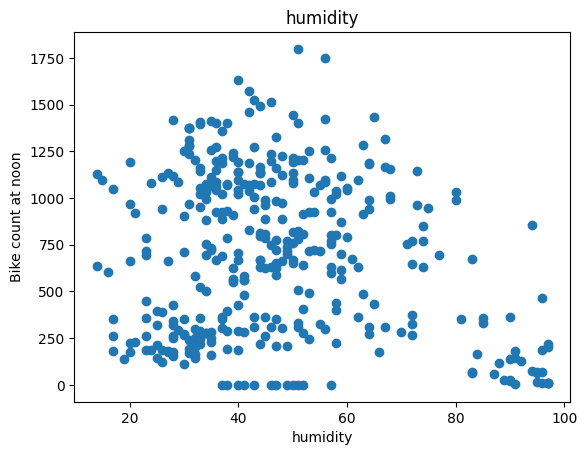

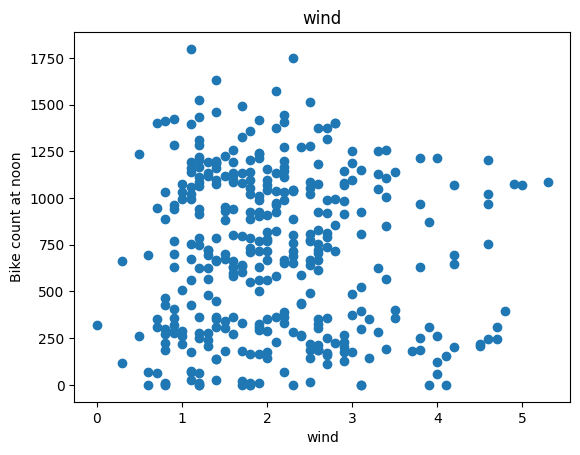

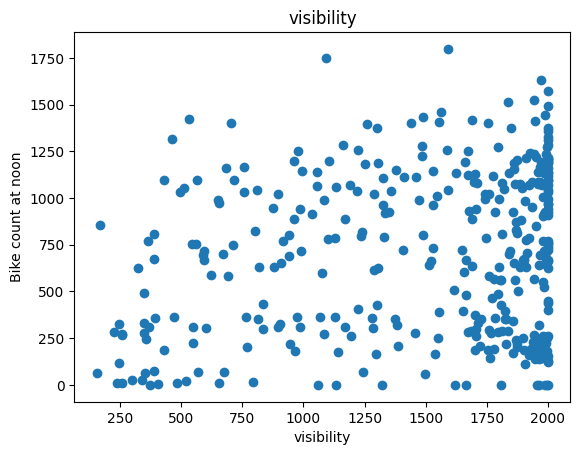

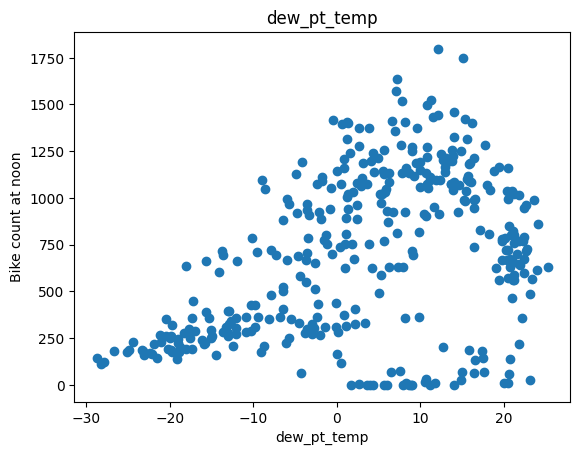

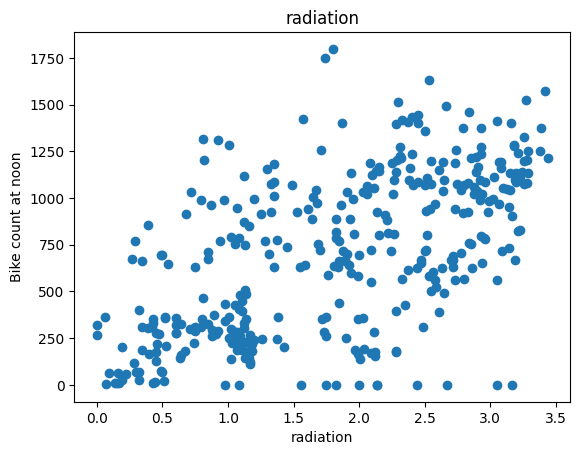

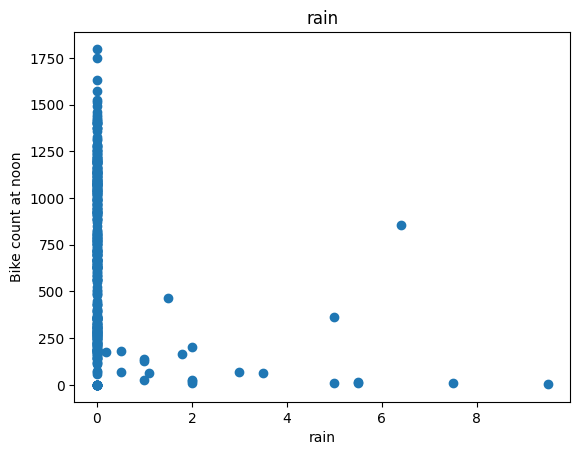

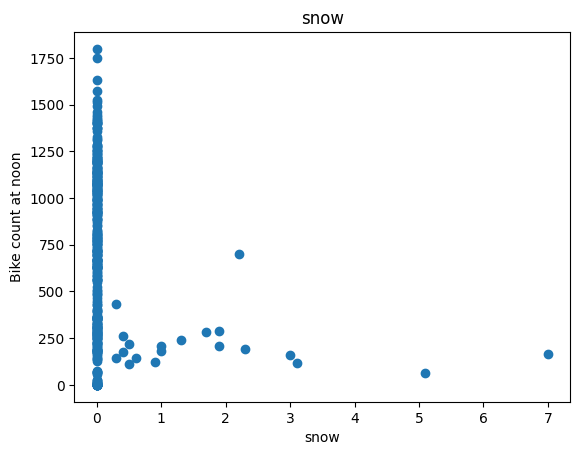

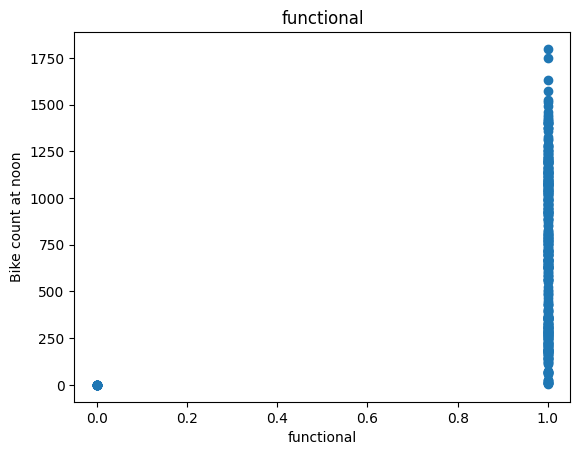

In [134]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

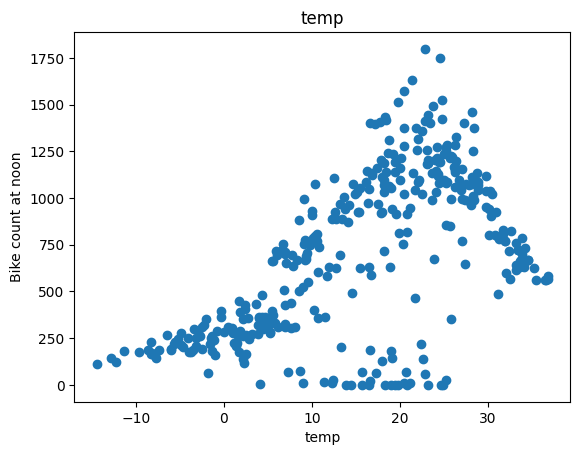

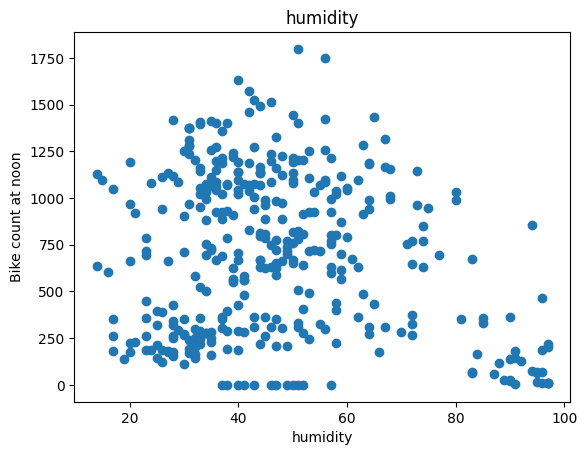

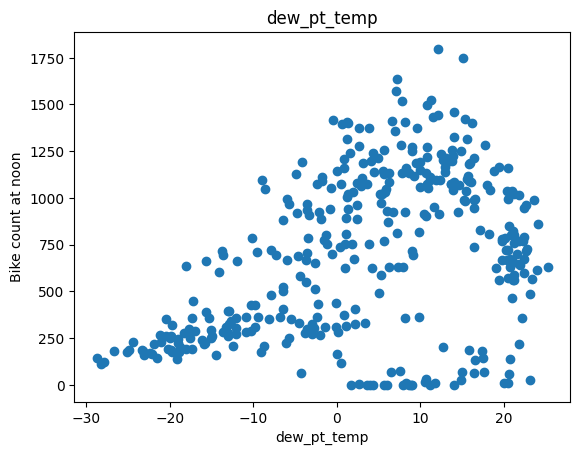

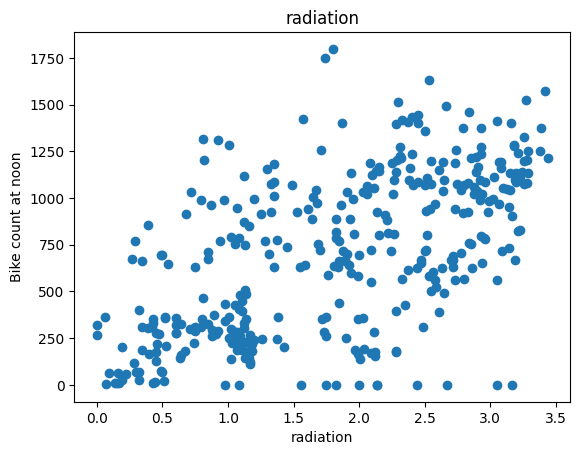

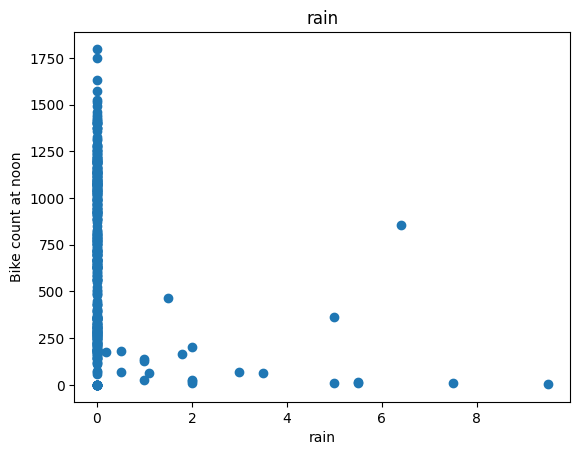

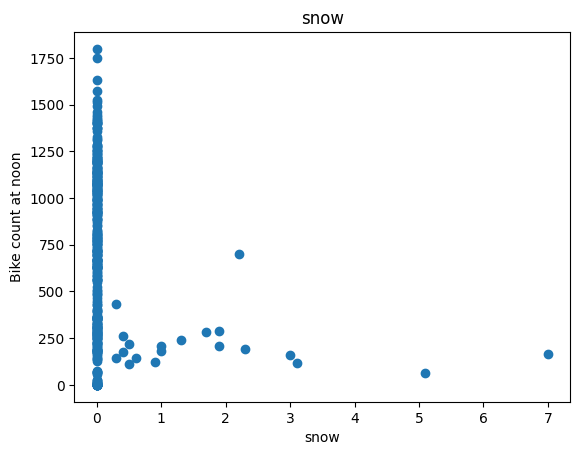

In [135]:
df = df.drop(["wind", "visibility", "functional"], axis=1)
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike count at noon")
  plt.xlabel(label)
  plt.show()

# Train, Test, Validation Dataset

In [136]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [137]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if (len(x_labels) == 1):
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y =  dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

# Linear Regression

In [138]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [139]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp) 

LinearRegression()

In [140]:
print(temp_reg.coef_, temp_reg.intercept_)
print(temp_reg.score(X_train_temp, y_train_temp))

[[20.86928252]] [377.9210036]
0.35535695435957704


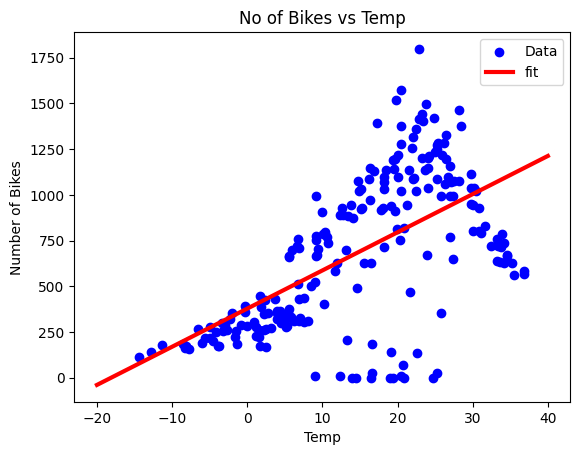

In [141]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="fit", color="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("No of Bikes vs Temp")
plt.show()

# Multiple Linear Regression

In [142]:
_, X_train, y_train = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_valid, y_valid = get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, X_test, y_test = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [143]:
all_reg = LinearRegression()
all_reg.fit(X_train, y_train) 

LinearRegression()

In [144]:
print(all_reg.coef_, all_reg.intercept_)
print(all_reg.score(X_train, y_train))

[[   0.52590649   -5.76009233   16.86249492  131.41180834 -104.92914935
     3.34417541]] [679.64030582]
0.49384807783716655


In [145]:
y_predict_lr = all_reg.predict(X_test)

# Linear Regression with Neural Network

In [146]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [147]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [148]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') 
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel( 'Epoch') 
  plt.ylabel('MSE')
  plt.legend() 
  plt.grid(True)
  plt.show()

In [149]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= 'mean_squared_error')

In [150]:
history = temp_nn_model.fit(
  X_train_temp.reshape(-1), y_train_temp,
  verbose=0, 
  epochs=1000, 
  validation_data=(X_valid_temp, y_valid_temp)
)

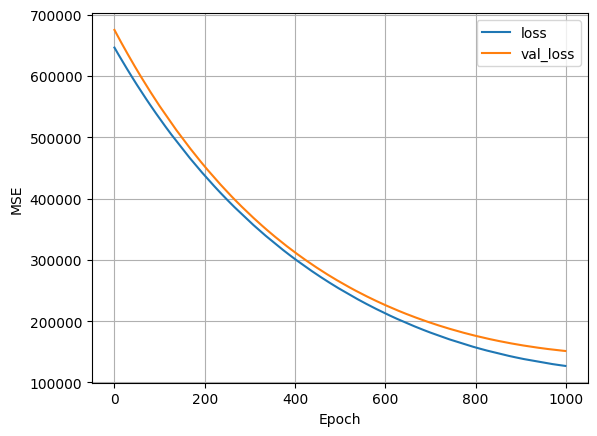

In [151]:
plot_loss(history)

In [152]:
print(X_train_temp)

[[ 22.9]
 [ 30.8]
 [ 18.2]
 [ 11.9]
 [ 26.7]
 [ 12.6]
 [ 15.3]
 [  8.1]
 [ 22.1]
 [ 24.8]
 [ -6. ]
 [  9. ]
 [ 10.4]
 [ -1.6]
 [  9.1]
 [ 13.4]
 [  9.1]
 [ 25. ]
 [-14.4]
 [ 25.4]
 [ 13.9]
 [ 26.2]
 [ 22.9]
 [ 31.1]
 [ 25.2]
 [ 20.1]
 [ 28.2]
 [ -3.2]
 [ 31.7]
 [ 20.7]
 [ 19.1]
 [ 27. ]
 [ -2.9]
 [ 13.3]
 [ 16.8]
 [ -8.3]
 [ 26.3]
 [ 20.5]
 [ 33.4]
 [ 33.2]
 [  9.2]
 [ 25.8]
 [ 34.2]
 [ 10.3]
 [ 15.5]
 [ 24.1]
 [  1.6]
 [ 12.3]
 [ 33.9]
 [  5.6]
 [  5.8]
 [ -1.3]
 [ 10.1]
 [  6.8]
 [  4. ]
 [ 27.5]
 [ 19.4]
 [ 13.2]
 [  0. ]
 [ 24.7]
 [ 27. ]
 [  7.6]
 [  4.3]
 [ 34.5]
 [ 20. ]
 [ 33.2]
 [ 10.8]
 [ 34.1]
 [ 26.4]
 [ 23.7]
 [ -4.1]
 [ 19.5]
 [ 10.2]
 [ -4.9]
 [  0.9]
 [ 19.6]
 [ 18.2]
 [  6.9]
 [  2.7]
 [ 10.6]
 [ 12.8]
 [  9.4]
 [ 17.8]
 [ 34.5]
 [ 14.6]
 [ 29.8]
 [ 18.4]
 [ -0.3]
 [  7. ]
 [  4. ]
 [  4.3]
 [ -2. ]
 [ 33.7]
 [ 14.7]
 [  6.2]
 [  5.5]
 [ 27.4]
 [ 27.4]
 [ 20.3]
 [ 23.8]
 [-12.8]
 [ 36.8]
 [ -3.9]
 [ -8.6]
 [-11.3]
 [ 18. ]
 [ 16.5]
 [ 21.2]
 [ 15.2]
 [ 23.2]
 [ 29.8]
 

4/4 [==============================] - 0s 2ms/step


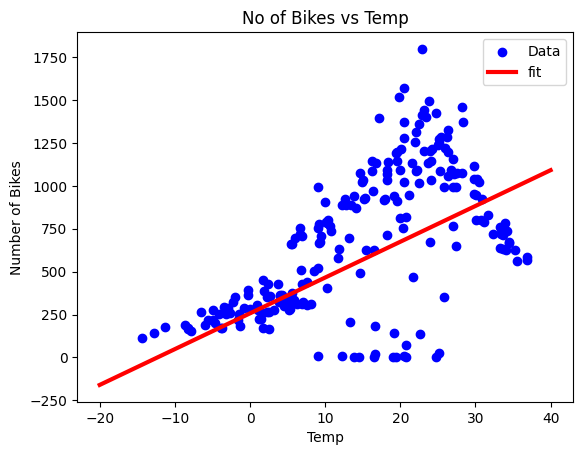

In [153]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="fit", color="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("No of Bikes vs Temp")
plt.show()

# Multiple Linear Regression with Neural Network


In [154]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6, ), axis=-1)
all_normalizer.adapt(X_train)

In [155]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [156]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss') 
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch') 
  plt.ylabel('MSE')
  plt.legend() 
  plt.grid(True)
  plt.show()

In [157]:
all_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss= 'mean_squared_error')

In [158]:
history = all_nn_model.fit(
  X_train, y_train,
  verbose=0, 
  epochs=1000, 
  validation_data=(X_valid, y_valid)
)

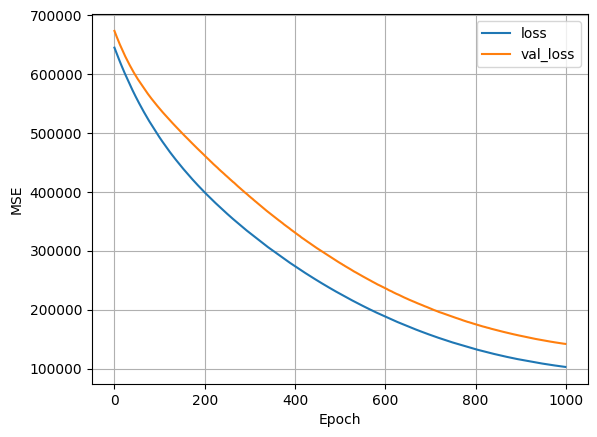

In [159]:
plot_loss(history)

# Neural Network Temp

In [160]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error')

In [161]:
history = nn_model.fit(
  X_train_temp, y_train_temp,
  verbose=0, 
  epochs=100, 
  validation_data=(X_valid_temp, y_valid_temp)
)

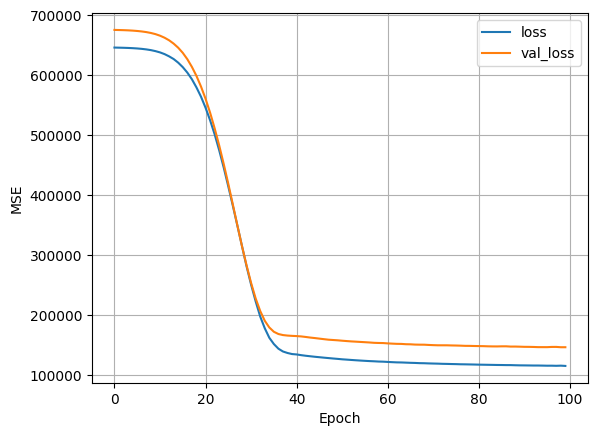

In [162]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


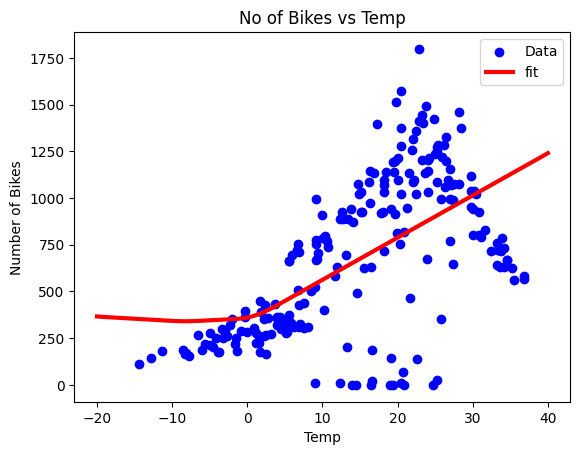

In [163]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="fit", color="red", linewidth=3)
plt.legend()
plt.xlabel("Temp")
plt.ylabel("Number of Bikes")
plt.title("No of Bikes vs Temp")
plt.show()

# Neural Network All

In [164]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6, ), axis=-1)
all_normalizer.adapt(X_train)

In [165]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss= 'mean_squared_error')

In [166]:
history = nn_model.fit(
  X_train, y_train,
  verbose=0, 
  epochs=100, 
  validation_data=(X_valid, y_valid)
)

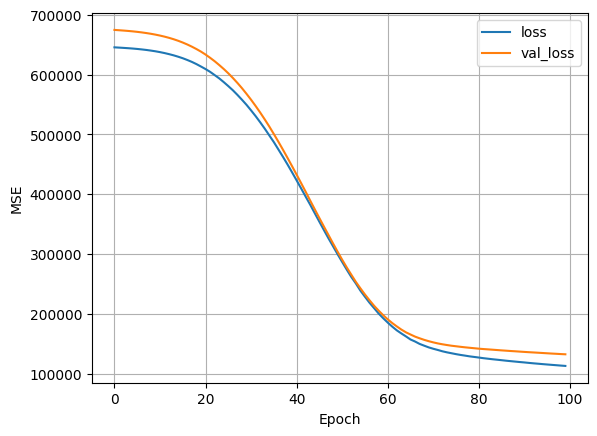

In [167]:
plot_loss(history)

# Calculate MSE for both Linear and Neural Net

In [168]:
y_predict_lr = all_reg.predict(X_test)
y_predict_nn = nn_model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [169]:
def Mse(y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()

In [170]:
Mse(y_predict_lr, y_test)

110260.72243135425

In [171]:
Mse(y_predict_nn, y_test)

143093.99760488156

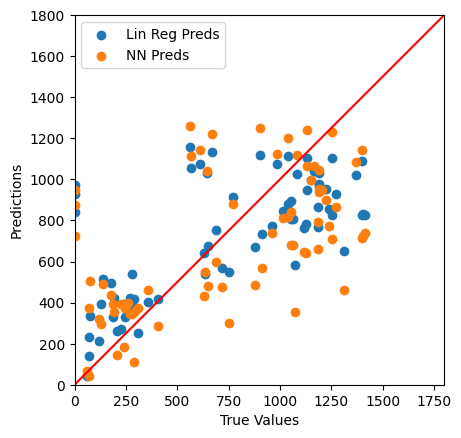

In [172]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, y_predict_lr, label="Lin Reg Preds") 
plt.scatter(y_test, y_predict_nn, label="NN Preds") 
plt.xlabel( "True Values") 
plt.ylabel("Predictions")
plt.legend()
lims = [0, 1800]
plt.xlim(lims) 
plt.ylim(lims)
_ = plt.plot (lims, lims, c="red")